In [1]:
import numpy as np
from scipy import special

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import latex

plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath} \usepackage{bm} \boldmath \boldsymbol"

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}

plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

In [3]:
ts = np.load('/scratch/mk7976/fit_results/x0/chisquare.npz')
dist = ts['chisq']

In [4]:
def chi_sq(x):
    x = np.array(x)
    return 1/(2**(75/2))/special.gamma(75/2)*x**(75/2-1)*np.exp(-x/2)

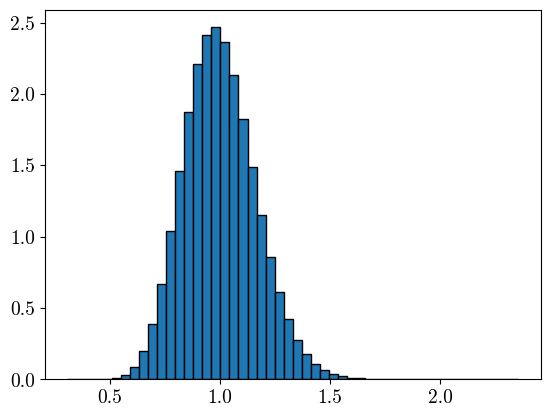

/share/apps/python/3.8.6/intel/lib/python3.8/site-packages/numpy-1.19.2-py3.8-linux-x86_64.egg/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
<ipython-input-8-1979f1fd038c>:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


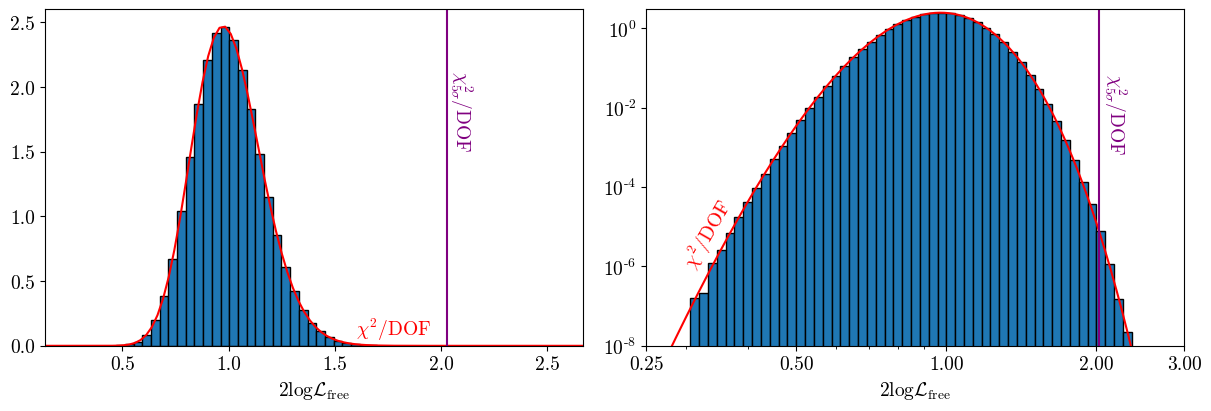

In [8]:
x_val = np.linspace(10,2000,1000)

x_val_log = np.logspace(np.log10(10.),np.log10(2000.),1000)


hist, bins, _ = plt.hist(dist/75.,bins=50,density=True,edgecolor='black')
plt.show()

fig, axd = plt.subplot_mosaic([['left','right']],
                              figsize=(12, 4),
                              constrained_layout=True)

axd['left'].hist(dist/75.,bins=50,density=True,edgecolor='black')
axd['left'].plot(x_val/75.,chi_sq(x_val)*75.,color='red')
axd['left'].set_xlim(10/75.,200/75.)
axd['left'].axvline(152./75,-100000000,10000000,color='purple')
axd['left'].set_ylim(0.,2.6)

axd['right'].plot(x_val,chi_sq(x_val),color='red',linestyle='--')
axd['right'].set_yscale('log')
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axd['right'].hist(dist/75., bins=logbins,density=True,edgecolor='black')
axd['right'].plot(x_val_log/75.,chi_sq(x_val_log)*75,color='red')
axd['right'].set_xscale('log')
axd['right'].set_yscale('log')
axd['right'].set_xlim(0.25,3.)
axd['right'].set_ylim(1e-8,3.0)
axd['right'].set_xticks([0.25,0.5, 1.,2., 3.])
axd['right'].get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

axd['right'].axvline(152./75.,-100000000,10000000,color='purple')

axd['left'].text(1.6, 0.08, r'$\chi^2$/DOF',rotation=0,color='red',fontweight='bold')
axd['left'].text(2.03,1.55, r'$\chi^2_{5\sigma}$/DOF',rotation=270,color='purple',fontweight='bold')

axd['right'].text(0.29, 10e-7, r'$\chi^2$/DOF',rotation=60,color='red',fontweight='bold')
axd['right'].text(2.05,1e-3, r'$\chi^2_{5\sigma}$/DOF',rotation=270,color='purple',fontweight='bold')



axd['left'].set_xlabel(r'$2\log\mathcal{L}_{\rm free}$')
axd['right'].set_xlabel(r'$2\log\mathcal{L}_{\rm free}$')

fig.show()